# Julia tutorial with SeqArray files

In [1]:
# load the JSeqArray package
using JSeqArray

Open an existing SeqArray file and display its structure. The dimensions of `sample.id` and `variant.id` tell you the total numbers of samples and variants, i.e., 1092 samples and 19,773 variants.

In [2]:
fn = joinpath(Pkg.dir(), "JSeqArray", "demo", "data", "1KG_phase1_release_v3_chr22.gds")
f = seqOpen(fn)

SeqArray File: /home/juser/.julia/v0.5/JSeqArray/demo/data/1KG_phase1_release_v3_chr22.gds (0B)
+    [  ] *
|--+ description   [  ] *
|--+ sample.id   { Str8 1092 LZMA_ra(10.5%), 914B } *
|--+ variant.id   { Int32 19773 LZMA_ra(8.39%), 6.6K } *
|--+ position   { Int32 19773 LZMA_ra(52.0%), 41.1K } *
|--+ chromosome   { Str8 19773 LZMA_ra(0.28%), 166B } *
|--+ allele   { Str8 19773 LZMA_ra(22.7%), 111.9K } *
|--+ genotype   [  ] *
|  |--+ data   { Bit2 2x1092x19773 LZMA_ra(8.17%), 882.5K } *
|  |--+ extra.index   { Int32 3x0 LZMA_ra, 19B } *
|  \--+ extra   { Int16 0 LZMA_ra, 19B }
|--+ phase   [  ]
|  |--+ data   { Bit1 1092x19773 LZMA_ra(0.02%), 550B } *
|  |--+ extra.index   { Int32 3x0 LZMA_ra, 19B } *
|  \--+ extra   { Bit1 0 LZMA_ra, 19B }
|--+ annotation   [  ]
|  |--+ id   { Str8 19773 LZMA_ra(35.2%), 77.0K } *
|  |--+ qual   { Float32 19773 LZMA_ra(3.62%), 2.9K } *
|  |--+ filter   { Int32,factor 19773 LZMA_ra(0.21%), 170B } *
|  |--+ info   [  ]
|  \--+ format   [  ]
\--+ samp

Genotypic data and annotations are stored in an array-oriented manner, providing efficient data access using the Julia programming language. `seqSetFilter()` and `seqGetData()` can be used together to retrieve data for a selected set of samples from a defined genomic region. `seqApply()` applies a user-defined function to array margins of genotypes and annotations.

In [3]:
sampid = seqGetData(f, "sample.id")  # a list of sample IDs

1092-element Array{String,1}:
 "HG00096"
 "HG00097"
 "HG00099"
 "HG00100"
 "HG00101"
 "HG00102"
 "HG00103"
 "HG00104"
 "HG00106"
 "HG00108"
 "HG00109"
 "HG00110"
 "HG00111"
 ⋮        
 "NA20809"
 "NA20810"
 "NA20811"
 "NA20812"
 "NA20813"
 "NA20814"
 "NA20815"
 "NA20816"
 "NA20818"
 "NA20819"
 "NA20826"
 "NA20828"

In [4]:
varid = seqGetData(f, "variant.id")  # a list of variant IDs

19773-element Array{Int32,1}:
     1
     2
     3
     4
     5
     6
     7
     8
     9
    10
    11
    12
    13
     ⋮
 19762
 19763
 19764
 19765
 19766
 19767
 19768
 19769
 19770
 19771
 19772
 19773

In [5]:
seqGetData(f, "annotation/qual")

19773-element Array{Float32,1}:
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 247.0
  49.0
 100.0
 100.0
 100.0
 100.0
   ⋮  
 280.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0
 100.0

In [6]:
seqGetData(f, "annotation/filter")

19773-element Array{String,1}:
 "PASS"
 "PASS"
 "PASS"
 "PASS"
 "PASS"
 "PASS"
 "PASS"
 "PASS"
 "PASS"
 "PASS"
 "PASS"
 "PASS"
 "PASS"
 ⋮     
 "PASS"
 "PASS"
 "PASS"
 "PASS"
 "PASS"
 "PASS"
 "PASS"
 "PASS"
 "PASS"
 "PASS"
 "PASS"
 "PASS"

## Define a subset of samples and variants

In [7]:
seqFilterSet(f, sampid[1:4], varid[1:6])

# of selected samples: 4
# of selected variants: 6


Get data from the subset of variant data.

In [8]:
seqGetData(f, "chromosome")

6-element Array{String,1}:
 "22"
 "22"
 "22"
 "22"
 "22"
 "22"

In [9]:
seqGetData(f, "allele")

6-element Array{String,1}:
 "A,G"
 "G,A"
 "G,T"
 "C,T"
 "G,A"
 "G,A"

In [10]:
# 0: the reference allele, 1: the first alternative allele, 0xFF: missing value
geno = seqGetData(f, "genotype")

2×4×6 Array{UInt8,3}:
[:, :, 1] =
 0x00  0x01  0x01  0x00
 0x00  0x00  0x00  0x01

[:, :, 2] =
 0x00  0x00  0x00  0x00
 0x00  0x01  0x01  0x00

[:, :, 3] =
 0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00

[:, :, 4] =
 0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00

[:, :, 5] =
 0x00  0x01  0x00  0x00
 0x00  0x00  0x01  0x00

[:, :, 6] =
 0x00  0x00  0x00  0x00
 0x00  0x00  0x00  0x00

In [11]:
dosage = seqGetData(f, "#dosage")  # 0xFF: missing value

4×6 Array{UInt8,2}:
 0x02  0x02  0x02  0x02  0x02  0x02
 0x01  0x01  0x02  0x02  0x01  0x02
 0x01  0x01  0x02  0x02  0x01  0x02
 0x01  0x02  0x02  0x02  0x02  0x02

## Calculation of Reference Allele Frequencies

In [12]:
seqFilterReset(f)  # reset the filter

# of selected samples: 1,092
# of selected variants: 19,773


In [13]:
af = seqApply(f, "genotype", asis="unlist") do geno::Array{UInt8,3}
    N = size(geno, 3)
    rv = Vector{Float64}(N)
    for k in 1:N
        sum = 0; n = 0
        for g in geno[:,:,k]
            if g != 0xFF
                sum += g == 0  # 0 is the reference allele
                n += 1
            end
        end
        rv[k] = sum / n
    end
    return rv
end

[==================================================] 100%, completed in 0s


## Principal Component Analysis

In [14]:
seqFilterReset(f)  # reset the filter

# of selected samples: 1,092
# of selected variants: 19,773


In [15]:
# initialize the covariance matrix
ss = Any[0.0]

seqApply(f, "#dosage", ss) do geno::Matrix{UInt8}, ss::Vector{Any}
    # calculate allele frequencies
    N = size(geno, 2); af = Vector{Float64}(N)
    for i in 1:N
        g = geno[:,i]; af[i] = mean(g[g .!= 0xFF])
    end
    af *= 0.5
    # normalized by allele frequencies
    g = Matrix{Float64}(size(geno))
    for i in 1:N
        g[:,i] = geno[:,i] - 2*af[i]
        g[:,i] /= sqrt(af[i] * (1 - af[i]))
    end
    # correct missing genotypes
    g[isnan(g)] = 0.0; g[geno .== 0xFF] = 0.0
    # update the cov matrix
    ss[1] += g * transpose(g)
end

# scaled
ss[1] *= size(ss[1], 1) / sum(diag(ss[1]))
ss[1]

[==================================================] 100%, completed in 0s


In [16]:
# eigen-decomposition
(w, v) = eig(-ss[1])

-w  # eigenvalues

1092-element Array{Float64,1}:
 39.6052     
 16.5196     
  5.18983    
  4.78401    
  4.59256    
  4.48968    
  4.07638    
  4.00637    
  3.89435    
  3.6689     
  3.55935    
  3.37597    
  3.2553     
  ⋮          
  0.240203   
  0.236452   
  0.23431    
  0.231839   
  0.218114   
  0.215627   
  0.198077   
  0.18193    
  0.129535   
  0.0526874  
  0.0512418  
 -3.06768e-14

In [17]:
v[:,1]  # the first eigenvector

1092-element Array{Float64,1}:
 -0.0147124
 -0.0154688
 -0.0135991
 -0.0151747
 -0.0146118
 -0.0122881
 -0.0136388
 -0.0135484
 -0.0150387
 -0.0134909
 -0.0138333
 -0.0133675
 -0.0135584
  ⋮        
 -0.0111869
 -0.0132867
 -0.0128998
 -0.0133382
 -0.0121674
 -0.0130977
 -0.0139683
 -0.0140026
 -0.0163832
 -0.0139423
 -0.0127312
 -0.0121628

In [18]:
# load the Gadfly package for plotting
using Gadfly

In [19]:
using StatsBase

# get population information
pop = seqGetData(f, "sample.annotation/Population")
countmap(pop)

Dict{String,Int64} with 14 entries:
  "CHS" => 100
  "PUR" => 55
  "CLM" => 60
  "FIN" => 93
  "TSI" => 98
  "LWK" => 97
  "JPT" => 89
  "MXL" => 66
  "CEU" => 85
  "YRI" => 88
  "ASW" => 61
  "CHB" => 97
  "IBS" => 14
  "GBR" => 89

In [20]:
# get ancestry information
ancestry = seqGetData(f, "sample.annotation/Ancestry")
countmap(ancestry)

Dict{String,Int64} with 4 entries:
  "EastAsia"     => 286
  "Europe"       => 379
  "SouthAmerica" => 181
  "Africa"       => 246

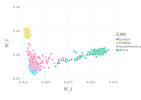

In [21]:
# add colors
plot(x=v[:,1], y=v[:,2], color=ancestry, Geom.point, Guide.xlabel("PC 1"), Guide.ylabel("PC 2"))